# Global economy faces gravest threat since the crisis as coronavirus spreads

In [1]:
#!conda install -c conda-forge wordcloud

In [2]:
import pandas as pd
import lxml.html
import requests

In [12]:
res = requests.get('http://www.oecd.org/economy/global-economy-faces-gravest-threat-since-the-crisis-as-coronavirus-spreads.htm')

In [13]:
root = lxml.html.fromstring(res.text)
root

<Element html at 0x20212c66f48>

In [15]:
content = root.cssselect('[class="section container"]')[0].text_content()
content

'\r\n    \r\n        OECD Home\r\n        EconomyGlobal economy faces gravest threat since the crisis as coronavirus spreads\r\n    \r\n    \r\n        Economy\r\n    \r\n    \r\n    \r\n    \r\n    \r\n#heading {\r\ndisplay: none;\r\n}\r\n\r\n\r\nGlobal economy faces gravest threat since the crisis as coronavirus spreads\r\n    \r\n        \r\n            \xa0\r\n            02/03/2020 - The coronavirus Covid-19 presents the global economy with its greatest danger since the financial crisis, according to the OECD’s latest Interim Economic Outlook.\n\xa0\n\n\n\n\nCovid-19 is spreading from China to other regions causing human suffering and economic disruption. It is raising health concerns and the risk of wider restrictions on the movement of people, goods and services, falls in business and consumer confidence and slowing production.\n\xa0\nThe Interim Outlook presents both a best-case scenario in which the extent of the coronavirus is broadly contained and a “domino” prospect of cont

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english')

In [17]:
tdm = cv.fit_transform([content]).toarray()
tdm

array([[1, 1, 1, 2, 2, 3, 1, 1, 1, 1, 1, 2, 2, 1, 1, 3, 1, 1, 1, 1, 1, 1,
        1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 4, 1, 1, 1,
        1, 1, 4, 1, 2, 1, 1, 2, 6, 5, 2, 2, 4, 1, 1, 1, 1, 2, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 4, 2, 1, 8, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2,
        1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 3, 1, 2, 1, 4, 1, 1,
        1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1,
        2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 8,
        1, 2, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 2, 1, 1, 1, 2,
        1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1,
        2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1,
        3, 1, 1]], dtype=int64)

In [18]:
df = pd.DataFrame({
    'word': cv.get_feature_names(),
    'freq': tdm.flat
})
df

,word,freq
0,02,1
1,03,1
2,100,1
3,19,2
4,2019,2
...,...,...
240,world,2
241,www,1
242,year,3
243,コロナウイルスの伝播により,1


In [19]:
df.sort_values('freq', ascending=False).head(20)

,word,freq
76,economy,8
153,oecd,8
101,global,7
158,outlook,6
52,coronavirus,6
53,countries,5
107,growth,4
40,china,4
46,confidence,4
73,economic,4


In [20]:
from wordcloud import WordCloud

In [21]:
wc = WordCloud(width=400, height=400, background_color='white')
#wc = WordCloud(font_path='C:\Windows\Fonts\malgun.ttf', width=400, height=400, background_color='white')
# 한글 파일일 경우 폰트 지정할 것.

In [22]:
frequencies = {word: freq for word, freq in zip(cv.get_feature_names(), tdm.flat)}
# dictionery 형태로 변경

In [23]:
wc.fit_words(frequencies)

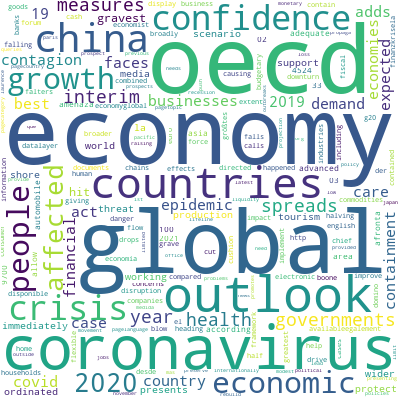

In [24]:
wc.to_image()